In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import music21
from music21 import *
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [166]:
#load the data
musicFeat = pd.read_csv('features.csv')


labels = pd.read_csv('labels1.csv')

#one big dataframe
df = pd.concat([musicFeat, labels], axis=1)

df = df.drop(['Unnamed: 0', 'Tempo'], axis = 1)
df = df.drop(['Composer', 'Title', 'KeySignature','Instrument','initialTimeSignature', 'timeSignatureChange'], axis = 1)
#print(df.columns)
#elim rows with no labels:
df = df.loc[df['Labels'] != 0]

print(df.info())

musicFeatures = df.drop(['Labels'], axis =1).values
lbls = df['Labels'].values
print(lbls)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 498
Data columns (total 4 columns):
Duration         181 non-null float64
highestOffset    181 non-null float64
highestTimeD     181 non-null float64
Labels           181 non-null int64
dtypes: float64(3), int64(1)
memory usage: 7.1 KB
None
[5 2 5 4 2 2 2 3 5 4 6 6 3 5 3 3 2 3 2 2 5 3 4 4 2 3 4 5 2 4 3 2 3 2 6 4 5
 7 8 3 2 3 4 5 4 4 4 4 3 5 4 2 7 5 5 5 4 4 5 5 5 5 5 5 5 6 6 3 5 5 5 4 5 5
 4 4 5 4 4 5 5 4 4 5 5 5 5 4 4 5 4 4 3 5 3 3 4 3 3 7 2 5 5 3 5 5 5 3 3 6 3
 3 3 6 2 6 6 6 8 5 6 3 6 3 6 2 2 2 4 3 6 6 3 4 3 3 4 6 6 3 3 3 3 3 6 3 3 3
 8 3 3 7 8 8 7 6 3 3 4 4 4 6 4 8 7 7 8 6 6 6 6 7 6 6 7 7 4 6 8 2 8]


In [167]:
#reduce labels to 3:
lbls3=[]
for i in lbls:
    if i == 2 or i == 3:
        x = 1
    elif i == 4 or i == 5:
        x = 2
    elif i == 6 or i == 7 or i==8:
        x = 3
    lbls3.append(x)
lbls3 = pd.Series(lbls3).values   
print(lbls)
print(lbls3)


[5 2 5 4 2 2 2 3 5 4 6 6 3 5 3 3 2 3 2 2 5 3 4 4 2 3 4 5 2 4 3 2 3 2 6 4 5
 7 8 3 2 3 4 5 4 4 4 4 3 5 4 2 7 5 5 5 4 4 5 5 5 5 5 5 5 6 6 3 5 5 5 4 5 5
 4 4 5 4 4 5 5 4 4 5 5 5 5 4 4 5 4 4 3 5 3 3 4 3 3 7 2 5 5 3 5 5 5 3 3 6 3
 3 3 6 2 6 6 6 8 5 6 3 6 3 6 2 2 2 4 3 6 6 3 4 3 3 4 6 6 3 3 3 3 3 6 3 3 3
 8 3 3 7 8 8 7 6 3 3 4 4 4 6 4 8 7 7 8 6 6 6 6 7 6 6 7 7 4 6 8 2 8]
[2 1 2 2 1 1 1 1 2 2 3 3 1 2 1 1 1 1 1 1 2 1 2 2 1 1 2 2 1 2 1 1 1 1 3 2 2
 3 3 1 1 1 2 2 2 2 2 2 1 2 2 1 3 2 2 2 2 2 2 2 2 2 2 2 2 3 3 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 1 1 3 1 2 2 1 2 2 2 1 1 3 1
 1 1 3 1 3 3 3 3 2 3 1 3 1 3 1 1 1 2 1 3 3 1 2 1 1 2 3 3 1 1 1 1 1 3 1 1 1
 3 1 1 3 3 3 3 3 1 1 2 2 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 1 3]


(181, 1)
(181, 1)


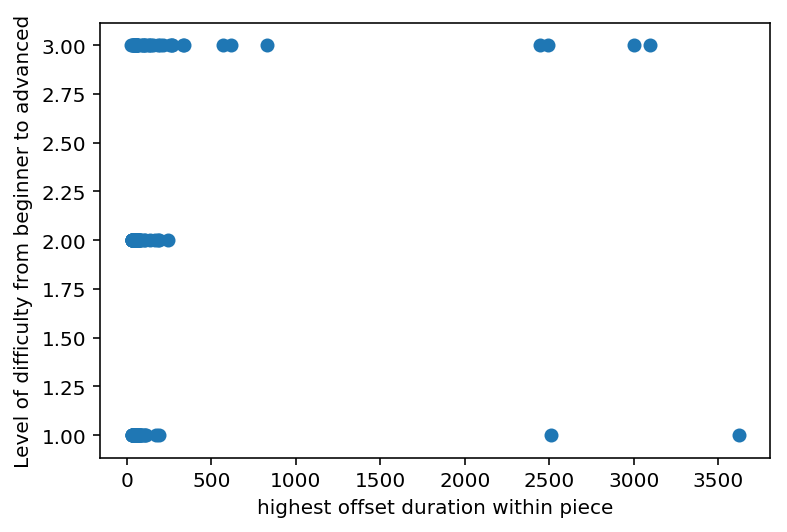

In [164]:
X_htd = musicFeatures[:,1]

y = lbls3.reshape(-1,1)
print(y.shape)
X_htd = X_htd.reshape(-1,1)
print(X_htd.shape)
#plot diff level as a function of htd (highestOffsetDuration)
plt.scatter(X_htd,y)
plt.ylabel('Level of difficulty from beginner to advanced')
plt.xlabel('highest offset duration within piece')
plt.show()

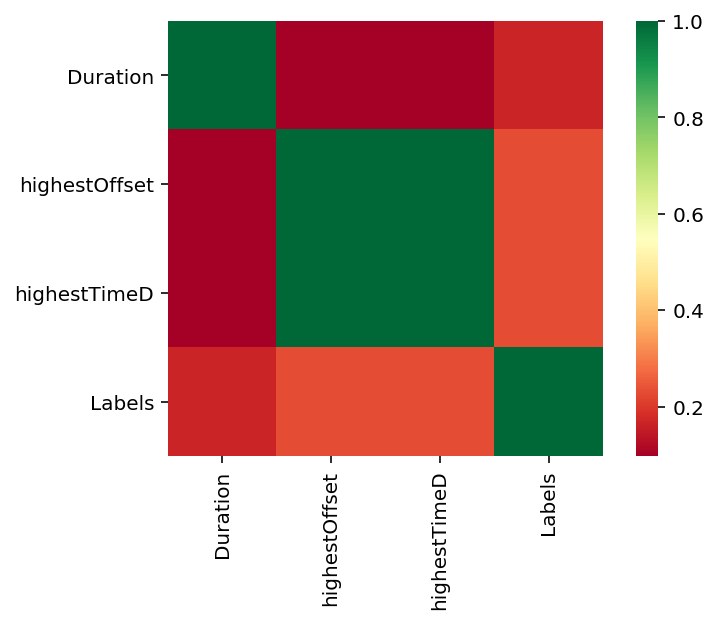

In [162]:
sns.heatmap(df.corr(), square=True, cmap = 'RdYlGn')

In [163]:
#split in test-train sets, classify
X_train, X_test, y_train, y_test = train_test_split(musicFeatures, lbls3, test_size = 0.25, random_state = 21, stratify=y)
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Test set predictions: \n{}'.format(y_pred))
print(knn.score(X_test, y_test))

Test set predictions: 
[1 3 2 3 1 3 1 2 2 3 2 2 2 1 3 1 2 3 1 1 2 2 2 1 2 1 1 2 1 3 1 2 2 1 3 2 2
 3 1 2 1 2 2 2 3 1]
0.45652173913043476


In [124]:
#validation:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 6  8  2]
 [ 6 10  3]
 [ 4  2  5]]
              precision    recall  f1-score   support

           1       0.38      0.38      0.38        16
           2       0.50      0.53      0.51        19
           3       0.50      0.45      0.48        11

   micro avg       0.46      0.46      0.46        46
   macro avg       0.46      0.45      0.45        46
weighted avg       0.46      0.46      0.46        46



In [168]:
#Extract features from file:


def featureExtractor(filename):
        
        #parse file
        p = converter.parse(filename)
        #p.plot('histogram', 'pitch')
        print(p.pitch)
        key = p.analyze('key') #returns the key
        chord = p.chordify() #returns the instrument and a stream object to extract other features
        d = chord.duration 
        #duration of piece
        dur = str(d)
        digits = r"\d+"
        d_dig = re.findall(digits,dur)
        duration = float(d_dig[1])+float(d_dig[2])/(10*len(d_dig[2]))    
        init_ts = p.recurse().getElementsByClass(meter.TimeSignature)[0]  #initial time signature
        it = str(init_ts)
        it_dig = re.findall(digits,it)
        initialTimeSig = it_dig[1] + '/' + it_dig[2]
        if len(set(p.recurse().getElementsByClass(meter.TimeSignature))):
            changeTimeSig = 0
        else:
            changeTimeSig = 1   
        highestOffset = chord.highestOffset #highest offset
        #highest of all element offsets plus duration
        highestTimeD=chord.highestTime
        #melInt = p.melodicIntervals()
        beatDuration = p.beatDuration
        instrument= str(chord.getInstruments())[21:-1]
        feats = [duration, highestOffset, highestTimeD]

        return feats

In [169]:
fName = 'musicXMLFiles/ClaraSchumann_WennIchEinVoegleinWaer.xml'
features = featureExtractor(fName)
#there is only one sample, so reshape:
features = np.array(features).reshape(1, -1)
y_pred_file = knn.predict(features)
print('Test set predictions: \n{}'.format(y_pred_file))
y_prob = knn.predict_proba(features)[:, 1]
print('Probability for predictions: \n{}'.format(y_prob))


AttributeError: 'Score' object has no attribute 'pitch'